In [4]:
from pathlib import Path

import matplotlib.pyplot as plt

from asi import draw_multi_crosss, get_wavelengths, load_spectral_image, reconstruct_rgb

root = Path(
    "/Users/hagayuya/Library/CloudStorage/GoogleDrive-haga.yuya2.2016@gmail.com/.shortcut-targets-by-id/1lu28OOb-OG-AT4lsiancCe0miLgxSzr2/ASI course 2024/group3/Session1"
)

# Spectral Scanner

In [5]:
spec_path = root / "Specim scanner/Color_checker_8_binning"

In [6]:
path = spec_path / "capture" / "solutions_scan_0110"
file_stem = str(path)
spectral_image, envi_header = load_spectral_image(file_stem)
!code "{path}".hdr

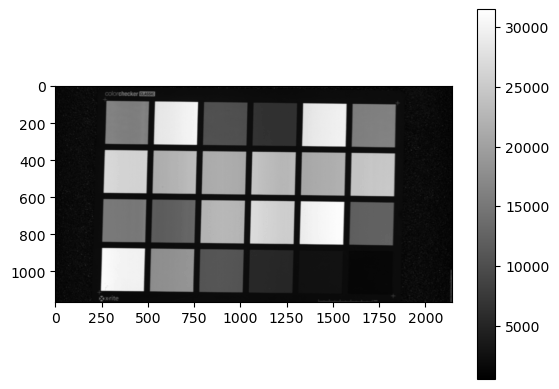

In [4]:
# Resolution
plt.rcParams["figure.dpi"] = 100
# show gray scale slice of 3D spectral image
plt.imshow(spectral_image[:, 100, :], cmap="gray")
plt.colorbar()

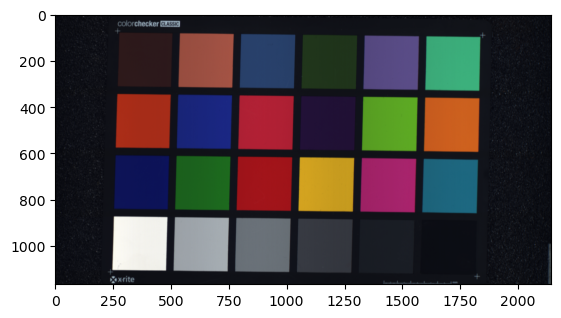

In [5]:
rgb_view = reconstruct_rgb(spectral_image, envi_header)
plt.imshow(rgb_view)

Text(0.5, 1.0, 'RGB view of spectral image')

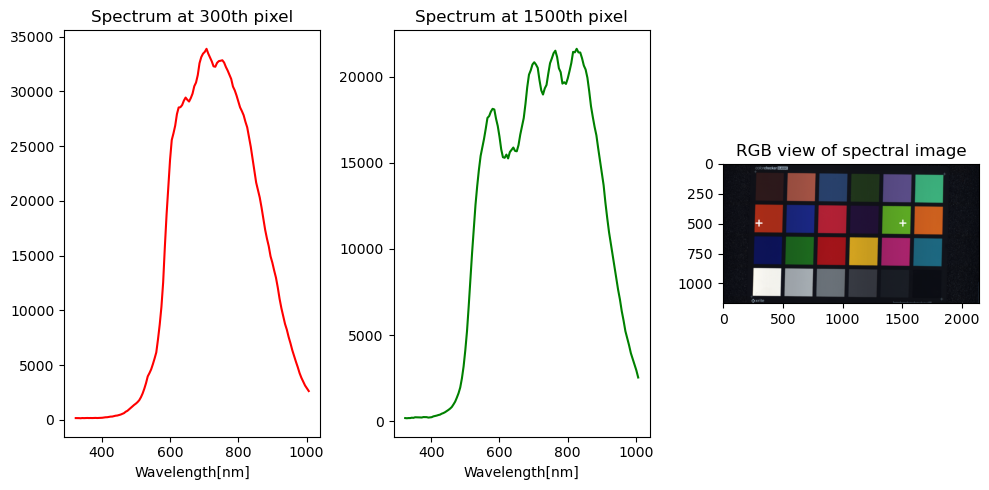

In [6]:
# Show spectra
colors = ["r", "g"]
positions = [(300, 500), (1500, 500)]
canvas = draw_multi_crosss(rgb_view, positions)

plt.rcParams["figure.dpi"] = 100
fig, axes = plt.subplots(1, 3, figsize=(10, 5), tight_layout=True)

wavelength = get_wavelengths(envi_header)
for pos, color, ax in zip(positions, colors, axes[:2]):
    ax.plot(wavelength, spectral_image[pos[1], :, pos[0]], color=color)
    ax.set_title(f"Spectrum at {pos[0]}th pixel")
    ax.set_xlabel("Wavelength[nm]")

axes[2].imshow(canvas)
axes[2].set_title("RGB view of spectral image")

## Specium IQ

In [7]:
iq_path = root / "SpecimIQ" / "404" / "capture"

In [8]:
path = iq_path / "404"
file_stem = str(path)
spectral_image, envi_header = load_spectral_image(file_stem)

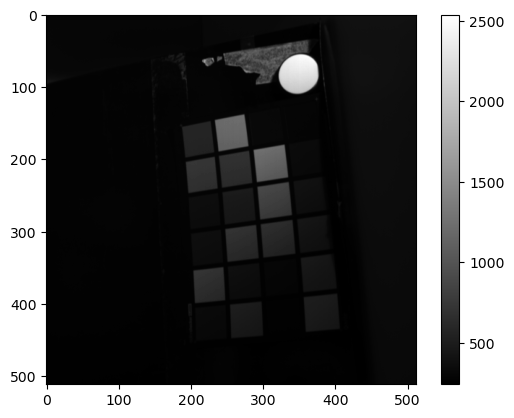

In [9]:
# Resolution
plt.rcParams["figure.dpi"] = 100
# show gray scale slice of 3D spectral image
plt.imshow(spectral_image[:, 100, :], cmap="gray")
plt.colorbar()

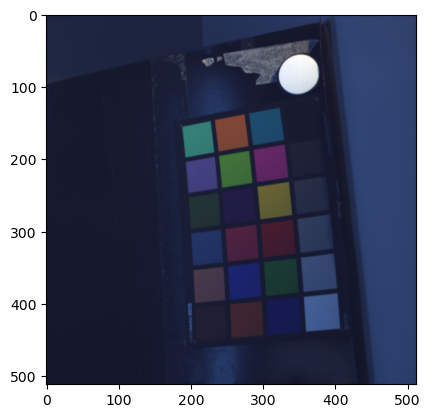

In [10]:
rgb_view = reconstruct_rgb(spectral_image, envi_header)
plt.imshow(rgb_view)
plt.show()

Text(0.5, 1.0, 'RGB view of spectral image')

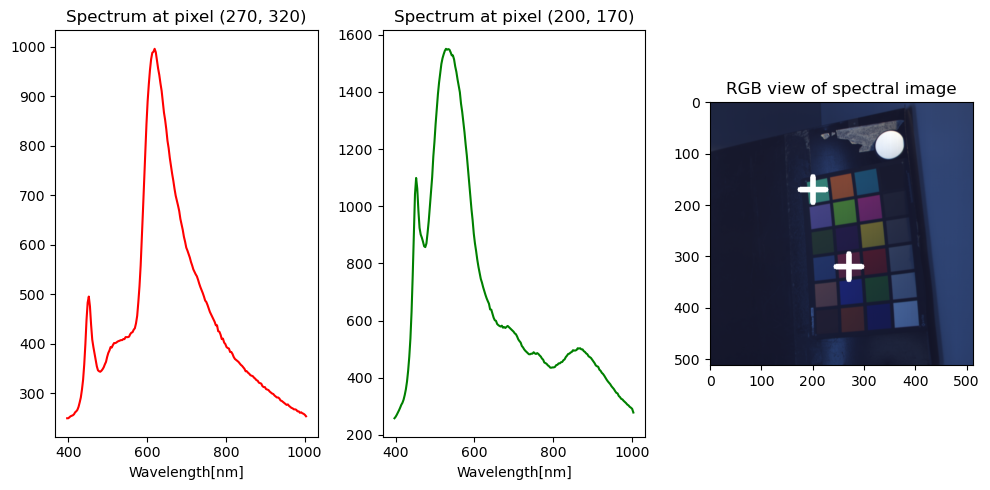

In [11]:
# Show spectra
colors = ["r", "g"]
positions = [(270, 320), (200, 170)]

canvas = draw_multi_crosss(rgb_view, positions)

plt.rcParams["figure.dpi"] = 100
fig, axes = plt.subplots(1, 3, figsize=(10, 5), tight_layout=True)

wavelength = get_wavelengths(envi_header)
for pos, color, ax in zip(positions, colors, axes[:2]):
    ax.plot(wavelength, spectral_image[pos[1], :, pos[0]], color=color)
    ax.set_title(f"Spectrum at pixel {pos}")
    ax.set_xlabel("Wavelength[nm]")

axes[2].imshow(canvas)
axes[2].set_title("RGB view of spectral image")